# Desafio Prático de Ciência e Análise de Dados

Caros(as) alunos(as),

Ao concluírem as atividades e estudos da disciplina — incluindo a lista de exercícios e o estudo dos slides — propomos um desafio aplicado: realizar a coleta e análise de dados reais para investigar as relações entre segurança pública, economia e demografia no estado do Ceará (ou em outra região de sua escolha).

- - -

## Etapas do Desafio

1. Coleta de dados
    Busquem informações na Secretaria da Segurança Pública e Defesa Social (SSPDS), abrangendo o período de 2009 a 2024 (ou o intervalo disponível).
    Complementem sua base com dados econômicos e demográficos — como PIB per capita, população e renda média — obtidos em fontes oficiais, como o IBGE, o IPEA ou portais de dados abertos.

2. Integração e análise
    Unifiquem as bases de dados, padronizando variáveis como ano, município e unidade da federação.
    Apliquem técnicas de tratamento, visualização e análise estatística para identificar possíveis relações entre indicadores econômicos e níveis de violência.

3. Visualização geográfica
    Construa um mapa de calor (heatmap) do Ceará, referente ao ano de 2024 (ou ao ano escolhido), representando o índice de homicídios por 100 mil habitantes.
    Utilize bibliotecas como GeoPandas, Plotly, Folium ou Geobr para gerar o mapa e interpretar as variações regionais da violência.

4. Criatividade e exploração
    Use sua criatividade para realizar novas descobertas, explorando padrões, comparações e correlações.
    Transforme dados em informações e conhecimento, apresentando insights relevantes sobre a realidade social analisada.

- - -

## Objetivo Final

Compreender, de forma prática e crítica, os métodos estatísticos e as etapas de pré-processamento e tratamento de dados, simulando desafios que podem ser encontrados no mundo real.
O propósito é analisar como fatores econômicos e demográficos podem estar associados à criminalidade, promovendo o uso integrado de estatística, programação e visualização de dados no contexto da Ciência de Dados aplicada à realidade social.


In [1]:
from io import BytesIO

import pandas as pd
import requests

In [2]:
_CVLI_LINK = 'https://www.sspds.ce.gov.br/wp-content/uploads/sites/24/2025/03/CVLI_2009-2024.xlsx'
_CVLI_SHEET = 'CVLI'

response = requests.get(_CVLI_LINK)
response.raise_for_status()

_cvli_content = BytesIO(response.content)
_cvli_content.seek(0)

_df_crimes = pd.read_excel(_cvli_content, sheet_name=_CVLI_SHEET, parse_dates=True)
YEAR_CONDITION = [data.year == 2024 for data in _df_crimes['Data']]

# filtra pelo ano
df_crimes = _df_crimes[YEAR_CONDITION]
df_crimes.head()

,Município,AIS,Natureza,Data,Hora,Dia da Semana,Meio Empregado,Gênero,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima
53047,Fortaleza,AIS 02,HOMICIDIO DOLOSO,2024-01-01,01:00:00.029000,Segunda,Arma de fogo,Masculino,22,Alfabetizado,Não Informada
53048,Crato,AIS 19,HOMICIDIO DOLOSO,2024-01-01,01:50:00.010000,Segunda,Arma de fogo,Masculino,24,Ensino Médio Incompleto,Não Informada
53049,Caucaia,AIS 11,HOMICIDIO DOLOSO,2024-01-01,02:08:00.010000,Segunda,Arma de fogo,Masculino,22,Ensino Fundamental Incompleto,Não Informada
53050,Itarema,AIS 17,HOMICIDIO DOLOSO,2024-01-01,09:00:00,Segunda,Arma de fogo,Masculino,27,Alfabetizado,Não Informada
53051,São Gonçalo do Amarante,AIS 23,HOMICIDIO DOLOSO,2024-01-01,10:59:59.971000,Segunda,Arma de fogo,Masculino,25,Ensino Médio Completo,Não Informada


In [3]:
contagem_de_crimes = df_crimes['Município'].value_counts()
contagem_de_crimes

Município
Fortaleza     834
Caucaia       249
Maracanaú     166
Sobral        121
Maranguape     85
             ... 
Quixelô         1
Palhano         1
Coreaú          1
Mucambo         1
Pacoti          1
Name: count, Length: 167, dtype: int64

In [4]:
_POPU_LINK = 'https://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2024/POP2024_20241230.xls'
_POPU_SHEET = 'MUNICÍPIOS'

response = requests.get(_POPU_LINK)
response.raise_for_status()

_popu_content = BytesIO(response.content)
_popu_content.seek(0)

_df_popu = pd.read_excel(_popu_content, sheet_name=_POPU_SHEET, parse_dates=True, header=1)
df_popu = _df_popu[_df_popu['UF'] == 'CE']
df_popu.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,Unnamed: 5
891,CE,23.0,101.0,Abaiara,10282.0,NaN
892,CE,23.0,150.0,Acarape,14306.0,NaN
893,CE,23.0,200.0,Acaraú,68758.0,NaN
894,CE,23.0,309.0,Acopiara,46215.0,NaN
895,CE,23.0,408.0,Aiuaba,14220.0,NaN


In [6]:
df_temp = df_popu.set_index('NOME DO MUNICÍPIO').join(contagem_de_crimes)

# TOTAL = homicidios_por_cidade.sum()
df_temp['crimes / 100_000 hab.'] = (df_temp['count'] / df_temp['POPULAÇÃO ESTIMADA']) * 100_000
columns = ['crimes / 100_000 hab.', 'POPULAÇÃO ESTIMADA', 'count']
df = df_temp[columns]
df.head()

,crimes / 100_000 hab.,POPULAÇÃO ESTIMADA,count
NOME DO MUNICÍPIO,,,
Abaiara,19.451469,10282.0,2.0
Acarape,41.940445,14306.0,6.0
Acaraú,14.543762,68758.0,10.0
Acopiara,36.784594,46215.0,17.0
Aiuaba,7.032349,14220.0,1.0


In [7]:
from geobr import read_municipality

gdf = read_municipality('CE', year=2024)
gdf.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,2300101.0,Abaiara,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.03004 -7.42438, -38.96988 ..."
1,2300150.0,Acarape,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-38.64909 -4.24606, -38.64845 ..."
2,2300200.0,Acaraú,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.98933 -3.11344, -39.99033 ..."
3,2300309.0,Acopiara,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.42507 -5.98629, -39.43923 ..."
4,2300408.0,Aiuaba,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.44798 -6.49708, -40.44745 ..."


<Axes: >

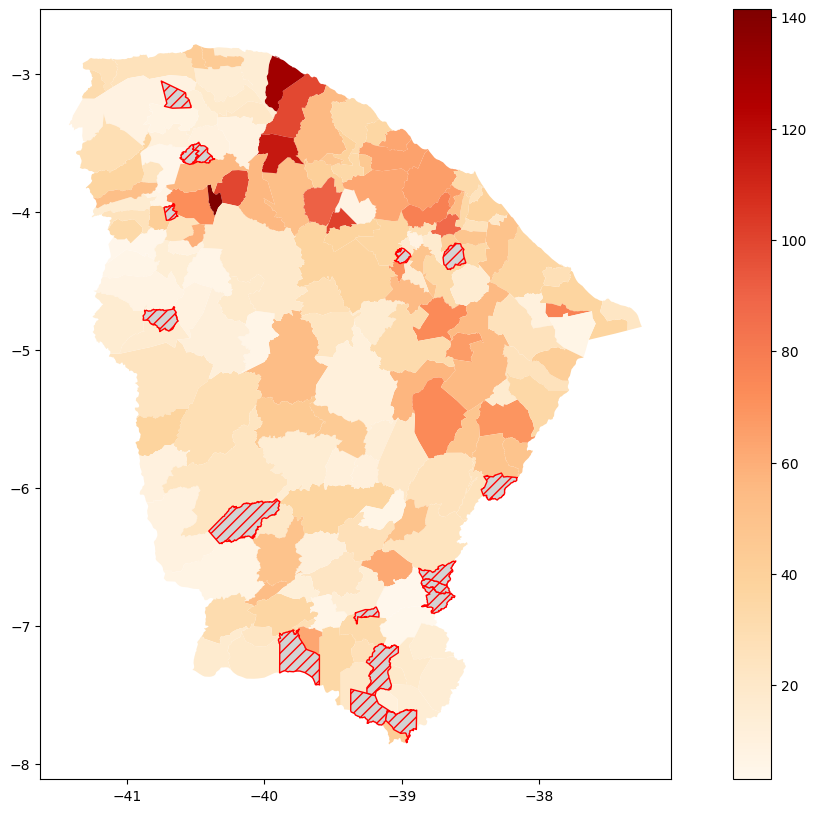

In [ ]:
new = gdf.set_index('name_muni').join(df)
new.plot(
    column='crimes / 100_000 hab.',
    legend=True,
    cmap='OrRd',
    figsize=(16, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    })
